# Now what is Intradimensional Association Rules ?

You can think of it in a sense of a single predicate being used to associate with itself. For example, you can imagine transaction data, as records containing purchases. Underlying in this data might be interesting associations or patterns. One example of such pattern we see in daily life is with our coffee/tea.


take for example three different records (MILK, JAM, COFFEE,SUGAR) 

[M,J,C,S]
[M,S,T]
[M,S,C]

from this we can see people who tend to buy sugar are also likely to purchase coffee and milk.  

## How do we measure the success of these rules, to find interesting rules in rule set?

Wheter a rule is interesting can be assed either subjectively or objectively. Ultimately in subjective judgment a judge is needed where he or she uses their domain knowledge to assess the viability of the rule

However, objective interestiness measures baed on statistics on the data can be used as one step toward the goal of weeding out uninteresting rules.

# What are these objective measures

1. Support 
2. Confidence
3. lift 
4.  x2
5. all_confidence
6. max_confidence
7. kulczynski

To keep the dicussion short, i will be exploring the suppport, confidence and lift measures. Lift measures the occurance of one lifting the occurance of the other, i.e the measure is in the form of a fraction where the numerator is the likelyhood of a customer purchasing both while the other is if they were independent.



In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

We first import the modules we will need for the intredimensional association mining. We will import the module mlextend for the frequent pattern analysis further we import panda to clean up and interact with the data: The data is from UCI machine learning onine retailer dataset

In [53]:
df = pd.read_excel('C:/Users/Darman/Downloads/Online Retail.xls')


In [54]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Preprocessing steps?


Through exploring the dataset we can see that the description of the item holds white spaces which need to be removed. 
Further, any transaction begin the C will be removed too and further any invocies without invoice number


First we strip the trailing white spaces from the description


In [55]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data transformation step

For market basket analysis, transaction must be grouped so that the products available would be on hot encoded. For example consider a  transaction dataset containing M C K L O  one transaction may contain M 1 C 0 K 0 L 0 O 1 which indicates the presence or absenses of the item in that transaction

In [56]:
basket = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [57]:
basket.head()

Description,12 IVORY ROSE PEG PLACE SETTINGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,...,WOODLAND STORAGE BOX SMALL,WRAP CIRCUS PARADE,WRAP COWBOYS,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP MONSTER FUN,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN"
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To complete our one hot encoding step, there is a need to normalise the quantity sum due to only caring about the presence and abscene of an item and not the quantity of the item, we can normalise it by setting any quantity greater than 0 to 1 and anything less than or equal to 0 as 0

In [58]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

Now that we have defined the encoding, we will need to apply it to the dataset. further we will need to drop the postage column 

In [59]:
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7% (this number was chosen so that I could get enough useful examples): This is the easiest step due to the mlextend library

In [60]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.282609,0.108696,0.086957,0.307692,2.830769,0.056238,1.287440
1,(3 PIECE SPACEBOY COOKIE CUTTER SET),(ROUND SNACK BOXES SET OF4 WOODLAND),0.108696,0.282609,0.086957,0.800000,2.830769,0.056238,3.586957
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(BAKING SET 9 PIECE RETROSPOT),0.217391,0.130435,0.086957,0.400000,3.066667,0.058601,1.449275
3,(BAKING SET 9 PIECE RETROSPOT),(ROUND SNACK BOXES SET OF 4 FRUITS),0.130435,0.217391,0.086957,0.666667,3.066667,0.058601,2.347826
4,(RED RETROSPOT TAPE),(CAKES AND BOWS GIFT TAPE),0.108696,0.086957,0.086957,0.800000,9.200000,0.077505,4.565217


The tricky part is knowing what to do with these rules so you have interesting rules that can be used

In [61]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(RED RETROSPOT TAPE),(CAKES AND BOWS GIFT TAPE),0.108696,0.086957,0.086957,0.800000,9.200000,0.077505,4.565217
5,(CAKES AND BOWS GIFT TAPE),(RED RETROSPOT TAPE),0.086957,0.108696,0.086957,1.000000,9.200000,0.077505,inf
8,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.108696,0.152174,0.108696,1.000000,6.571429,0.092155,inf
22,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.108696,0.108696,0.086957,0.800000,7.360000,0.075142,4.456522
23,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.108696,0.108696,0.086957,0.800000,7.360000,0.075142,4.456522
24,(RED RETROSPOT TAPE),(STARS GIFT TAPE),0.108696,0.108696,0.086957,0.800000,7.360000,0.075142,4.456522
25,(STARS GIFT TAPE),(RED RETROSPOT TAPE),0.108696,0.108696,0.086957,0.800000,7.360000,0.075142,4.456522
32,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.086957,0.086957,0.086957,1.000000,11.500000,0.079395,inf
33,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.086957,0.086957,0.086957,1.000000,11.500000,0.079395,inf
34,"(JAM JAR WITH GREEN LID, JAM MAKING SET PRINTED)",(JAM JAR WITH PINK LID),0.108696,0.152174,0.108696,1.000000,6.571429,0.092155,inf


# Rules visualisation 



In [62]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])
conviction= rules.as_matrix(columns=['conviction'])
lift = rules.as_matrix(columns=['lift'])

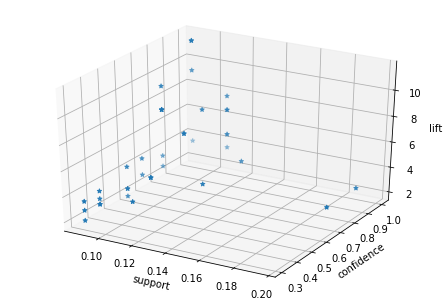

In [63]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)


ax.set_xlabel('support')
ax.set_ylabel('confidence')
ax.set_zlabel('lift')

ax.scatter(support,confidence,lift, marker="*")
pyplot.show()



Some basic things we can understand from the plot of rules. That support which means containing both item A and item B in the basket out of the dataset, wheras confidence is a measure of given item B what is the probability of A and lift is a measure of occurance of the rise of B given A. Therefore, we can see from the plot that the rules with around 0.14, confidence 1.0 and a lift of 4 or more are rules of interest that can be expanded upon


In [64]:
rules.shape

(40, 9)

In [65]:
display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.282609,0.108696,0.086957,0.307692,2.830769,0.056238,1.287440
1,(3 PIECE SPACEBOY COOKIE CUTTER SET),(ROUND SNACK BOXES SET OF4 WOODLAND),0.108696,0.282609,0.086957,0.800000,2.830769,0.056238,3.586957
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(BAKING SET 9 PIECE RETROSPOT),0.217391,0.130435,0.086957,0.400000,3.066667,0.058601,1.449275
3,(BAKING SET 9 PIECE RETROSPOT),(ROUND SNACK BOXES SET OF 4 FRUITS),0.130435,0.217391,0.086957,0.666667,3.066667,0.058601,2.347826
4,(RED RETROSPOT TAPE),(CAKES AND BOWS GIFT TAPE),0.108696,0.086957,0.086957,0.800000,9.200000,0.077505,4.565217
5,(CAKES AND BOWS GIFT TAPE),(RED RETROSPOT TAPE),0.086957,0.108696,0.086957,1.000000,9.200000,0.077505,inf
6,(ROUND SNACK BOXES SET OF 4 FRUITS),(CHILDS BREAKFAST SET CIRCUS PARADE),0.217391,0.152174,0.086957,0.400000,2.628571,0.053875,1.413043
7,(CHILDS BREAKFAST SET CIRCUS PARADE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.152174,0.217391,0.086957,0.571429,2.628571,0.053875,1.826087
8,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.108696,0.152174,0.108696,1.000000,6.571429,0.092155,inf
9,(JAM JAR WITH PINK LID),(JAM JAR WITH GREEN LID),0.152174,0.108696,0.108696,0.714286,6.571429,0.092155,3.119565
